# Matplotlib Settings

* 한글 폰트 설치: 
``` bash
$ sudo add-apt-repository "deb http://dev.naver.com/repos deb/"
$ sudo apt-get update
$ sudo apt-get install fonts-nanum fonts-nanum-coding fonts-nanum-extra
$ ll /usr/share/fonts/truetype/nanum/
```

* 한글 사용:
``` python
plt.rcParams["font.family"] = 'NanumGothic'
```

* "\-" 표시 안될때:
``` python
plt.rcParams["axes.unicode_minus"] = False
```

* grid 추가:
``` python
ax.grid(axis='y', linestyle='-.')    
```

* grid behind the graph:
``` python
# control zorder
ax.grid(axis='y', linestyle='-.', zorder=0)
ax.bar(xticks, yticks, width=bar_width, zorder=3)
```

* x, y축 tick 크기 변경:
``` python
ax.tick_params(labelsize=14)
```

* y축 tick 간격 설정:
``` python
# 0~18까지 4씩 끊어서 표시
ax.set_ybound(0, 18)    
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
```

* tick 설정:
``` python
# labels는 보여지는 내용
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)
```

* label 설정:
``` python
# labelpad: axis, label 사이 간격
ax.set_ylabel('월평균 발전시간 (시간)', fontsize=17, labelpad=20)
```

* figure 저장:
``` python
import matplotlib.ticker as ticker
# bbox_inches: If ‘tight’, try to figure out the tight bbox of the figure
fig.savefig('figure/example1.png', bbox_inches='tight')
```

* plot marker:
``` python
# 아래쪽 삼각형: (3, 0, 180)
# linestyle: None이면 line표기 X
ax.plot(xticks, yticks, color='red', marker=(3, 0, 180), linestyle='None')
```

* legend outside the box:
``` python
# bbox_to_anchor(x, y)
ax.legend(loc=1, fontsize=15, bbox_to_anchor=(1.23, 1))
```

* errobar without line connection:
``` python
# add fmt='none'
# note: yticks_lower/upper: difference between lower_value and yticks / yticks and upper_value respectively
# see: #6
ax.errorbar(xticks, yticks, yerr=[yticks_lower, yticks_upper], fmt='none', zorder=4, color='blue', capsize=4)
```

* cmap colors:
![alt text](figure/matplotlib_colors.png "Title")

In [1]:
from datetime import datetime, timedelta, date
import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.unicode_minus"] = False

## 사용할 데이터 전처리

In [2]:
df = pd.read_csv('data/data1.csv')
df['dt'] = df['dt'].apply(lambda x: pd.Timestamp(x))

In [3]:
df['year'] = df['dt'].apply(lambda x: x.year)
df['month'] = df['dt'].apply(lambda x: x.month)
df['day'] = df['dt'].apply(lambda x: x.date())

In [4]:
monthly = (df.groupby(['month', 'day'])[['trueYield', 'predictYield']].sum()/18).groupby(['month']).mean()

## Examples

### 1. plot

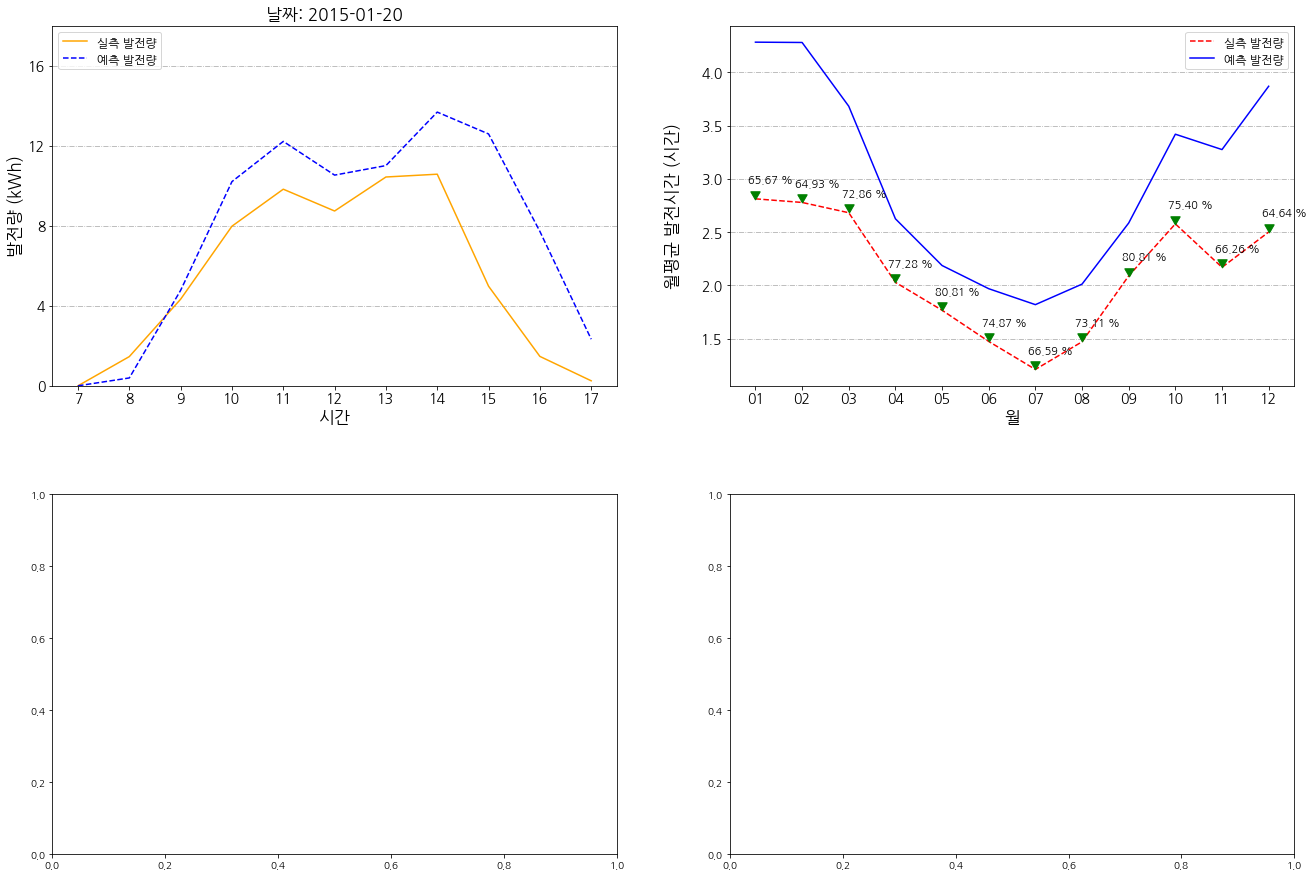

In [5]:
# 2x2 subplot
fig, axarr = plt.subplots(2, 2)

# ------------------------------------
# 1. 
# ------------------------------------
day = date(2015, 1, 20)
data = df[df['day'] == day].sort_values('dt')

xticks = data['dt'].apply(lambda x: x.hour)
yticks1 = data['trueYield']
yticks2 = data['predictYield']

ax = axarr[0, 0]
# grid 설정
ax.grid(axis='y', linestyle='-.')
# x, y축 폰트 크기
ax.tick_params(labelsize=14)

ax.plot(xticks, yticks1, color='orange', label='실측 발전량')
ax.plot(xticks, yticks2, color='blue', linestyle='--', label='예측 발전량')

# legend
ax.legend(loc=2, fontsize=12)

# x축 세팅
ax.set_xticks(xticks)
ax.set_xlabel('시간', fontsize=17)

# y축 세팅
ax.set_ylabel('발전량 (kWh)', fontsize=17)
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.set_ybound(0, 18)

ax.set_title('날짜: {}'.format(day), fontsize=17)

# ------------------------------------
# 2.
# ------------------------------------
xticks = range(12)
xticks_str = [str(m+1).zfill(2) for m in xticks]

trues = monthly['trueYield'].tolist()
preds = monthly['predictYield'].tolist()

text_marker =  ['{:.2f} %'.format(trues[i]/preds[i]*100) for i in range(len(trues))]

ax = axarr[0, 1]

# grid 설정
ax.grid(axis='y', linestyle='-.')
# x, y축 폰트 크기
ax.tick_params(labelsize=14)

ax.plot(xticks, trues, color='red', linestyle='--', label='실측 발전량')
ax.plot(xticks, preds, color='blue', linestyle='-', label='예측 발전량')
ax.legend(loc=1, fontsize=12)

# x축 세팅
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)
ax.set_xlabel('월', fontsize=17)

# y축 세팅 (labelpad로 간격 조정 가능)
ax.set_ylabel('월평균 발전시간 (시간)', fontsize=17, labelpad=20)
ax.set_ybound(0, 6)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# 세모 추가
tri_pos = [t + 0.05 for t in trues]
ax.plot(xticks, tri_pos, color='green', marker=(3, 0, 180), linestyle='None', markersize=11)
for i, l in enumerate(trues, start=0):
    ax.text(i-0.15, trues[i]+0.15, text_marker[i], fontsize=11)

fig.subplots_adjust(right=3, top=3, hspace=0.3)
fig.savefig('figure/example1.png', bbox_inches='tight')

## 2. barplot

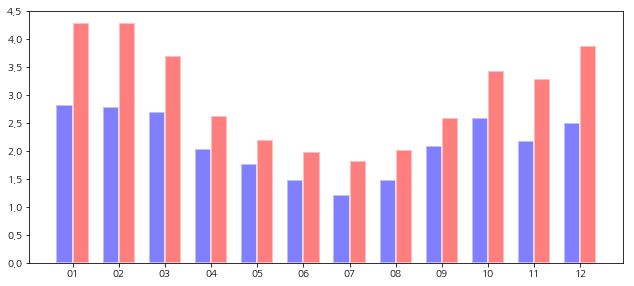

In [6]:
opacity = 0.5
bar_width = 0.35
xticks1 = range(12)
xticks2 = [x+bar_width for x in xticks1]

xticks = [m+bar_width/2. for m in xticks1]
xticks_str = [str(m+1).zfill(2) for m in xticks1]

yticks1 = monthly['trueYield']
yticks2 = monthly['predictYield']

fig, ax = plt.subplots(1, 1)
ax.bar(xticks1, yticks1, color='blue', width=bar_width, alpha=opacity, edgecolor='white', linewidth=2)
ax.bar(xticks2, yticks2, color='red', width=bar_width, alpha=opacity, edgecolor='white', linewidth=2)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)
fig.subplots_adjust(right=1.5, top=1)

## 3. scatter plot

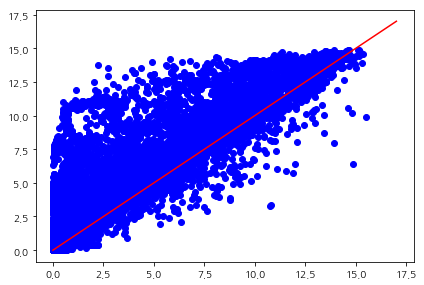

In [7]:
trues = df['trueYield']
preds = df['predictYield']

fig, ax = plt.subplots(1, 1)
ax.scatter(trues, preds, color='blue')
ax.plot(range(18), range(18), color='red')

fig.subplots_adjust(right=1, top=1)

## 4. histogram with confidence interval

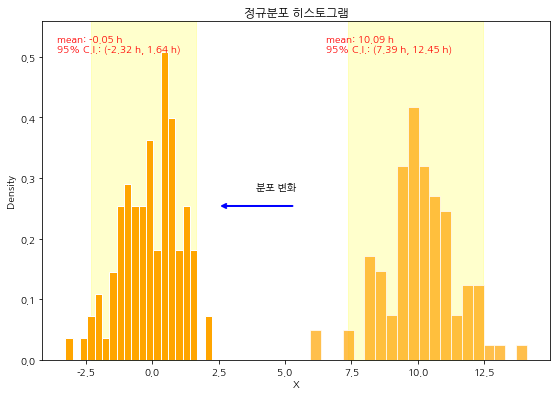

In [8]:
n_bin = 20
opacity = 1

alpha = 0.05
# 오른쪽 분포
dist1 = np.random.normal(10, 1.5, 100)
# 왼쪽 분포
dist2 = np.random.normal(0, 1, 100)

mu1 = np.mean(dist1)
l1 = np.percentile(dist1, (alpha/2)*100)
u1 = np.percentile(dist1, (1-alpha/2)*100)

mu2 = np.mean(dist2)
l2 = np.percentile(dist2, (alpha/2)*100)
u2 = np.percentile(dist2, (1-alpha/2)*100)

# y축 최대 범위
max_val = max(max(np.histogram(dist1, bins=n_bin, normed=True)[0]),
              max(np.histogram(dist2, bins=n_bin, normed=True)[0]))

# 통계량 나타낼 위치
txt_pos1 = dist1.min()*1.1
txt_pos2 = dist2.min()*1.1

fig, ax = plt.subplots(1, 1)
ax.hist(dist1, bins=n_bin, color='orange', normed=True, edgecolor='white', alpha=opacity*0.7)
ax.hist(dist2, bins=n_bin, color='orange', normed=True, edgecolor='white', alpha=opacity)

ax.set_xlabel('X')
ax.set_ylabel('Density')

ax.set_title('정규분포 히스토그램')
ax.set_ylim(0, max_val*1.1)

# 신뢰구간 표기
ax.fill_between((l1, u1), 0, [max_val*1.1, max_val*1.1], color='yellow', alpha=0.2)
ax.fill_between((l2, u2), 0, [max_val*1.1, max_val*1.1], color='yellow', alpha=0.2)

# 요약값 표기
words = 'mean: {:.2f} h\n95% C.I.: ({:.2f} h, {:.2f} h)'
ax.text(txt_pos1, max_val, words.format(mu1, l1, u1), color='red')
ax.text(txt_pos2, max_val, words.format(mu2, l2, u2), color='red')

# 화살표 표기
arrow_from = dist1.min()*0.9
arrow_to = dist2.max()*1.1
arrowprops = {
    'arrowstyle': '->',
    'lw': 2,
    'color': 'blue'
}
ax.annotate('',xy=(arrow_to, max_val/2), xytext=(arrow_from, max_val/2), arrowprops=arrowprops)
ax.text((arrow_to+arrow_from)/2, (max_val/2)*1.1, '분포 변화')
fig.subplots_adjust(right=1.3, top=1.3)

## 5. barplot advanced

In [9]:
data = pd.read_csv('data/data3.csv', index_col=0)

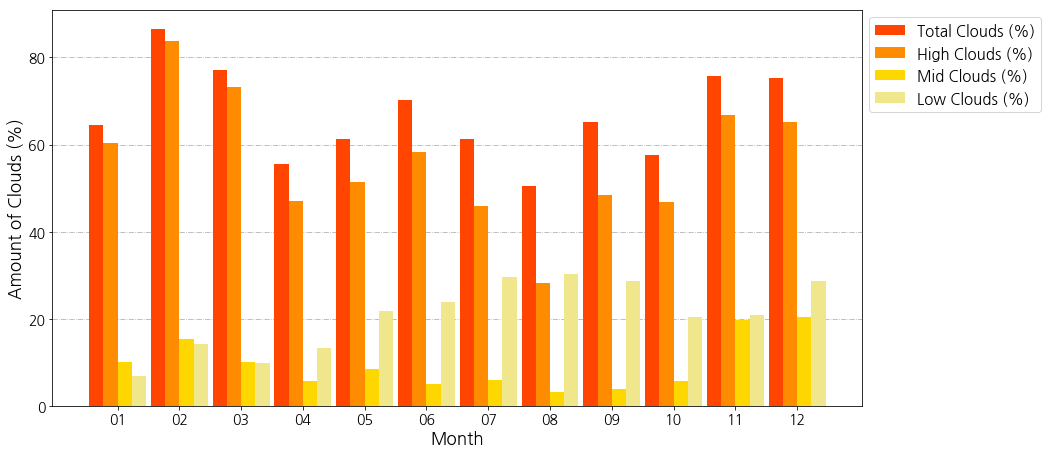

In [10]:
col = ['total_clouds', 'high_clouds', 'mid_clouds', 'low_clouds']
legend_name = ['Total Clouds (%)', 'High Clouds (%)', 'Mid Clouds (%)', 'Low Clouds (%)']
colors = ['orangered', 'darkorange', 'gold', 'khaki']

bar_width = 0.23

_xticks = range(len(data))

fig, ax = plt.subplots(1, 1)

ax.grid(axis='y', linestyle='-.', zorder=0)
ax.tick_params(labelsize=14)

for i, _col in enumerate(col):
    yticks = data[_col]
    xticks = [t+bar_width*i for t in _xticks]

    ax.bar(xticks, yticks, width=bar_width, color=colors[i], zorder=3, label=legend_name[i])
    
xticks = [t+bar_width*(len(col)-1)/2 for t in _xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)

ax.set_xlabel('Month', fontsize=17)
ax.set_ylabel('Amount of Clouds (%)', fontsize=17)
ax.legend(loc=1, fontsize=15, bbox_to_anchor=(1.23, 1))

fig.subplots_adjust(right=2, top=1.5)

## 6. barplot with error bar

In [11]:
data = pd.read_csv('data/data4.csv', index_col=0)

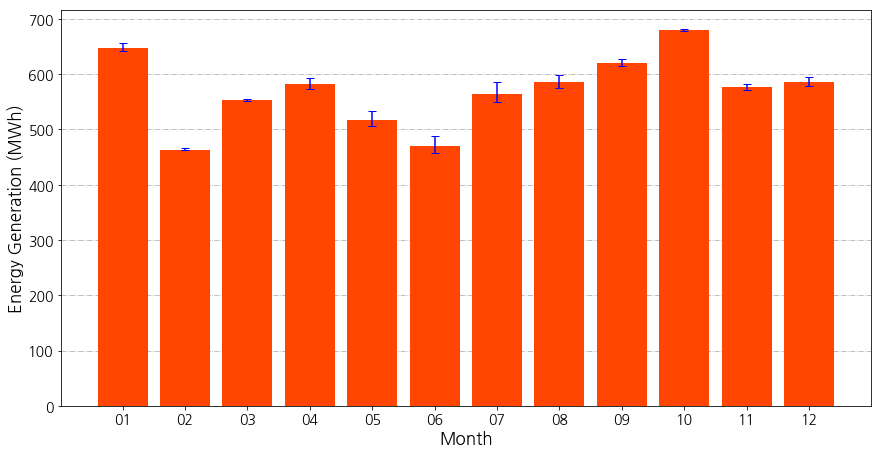

In [12]:
col = 'avg'

xticks = range(len(data))
xticks_str = ['{:02d}'.format(i) for i in range(1, 13)]
yticks = data[col]
yticks_lower = yticks - data['lower']
yticks_upper = data['upper'] - yticks

fig, ax = plt.subplots(1, 1)
ax.grid(axis='y', linestyle='-.', zorder=0)
ax.tick_params(labelsize=14)

ax.bar(xticks, yticks, color='orangered', zorder=3)
ax.errorbar(xticks, yticks, yerr=[yticks_lower, yticks_upper], fmt='none', zorder=4, color='blue', capsize=4)

ax.set_xticks(xticks)
ax.set_xticklabels(xticks_str)

ax.set_xlabel('Month', fontsize=17)
ax.set_ylabel('Energy Generation (MWh)', fontsize=17)

fig.subplots_adjust(right=2, top=1.5)

## 7. heatmap

In [13]:
data = pd.read_csv('data/data5.csv', index_col=0)
data.columns.name = 'tilt'

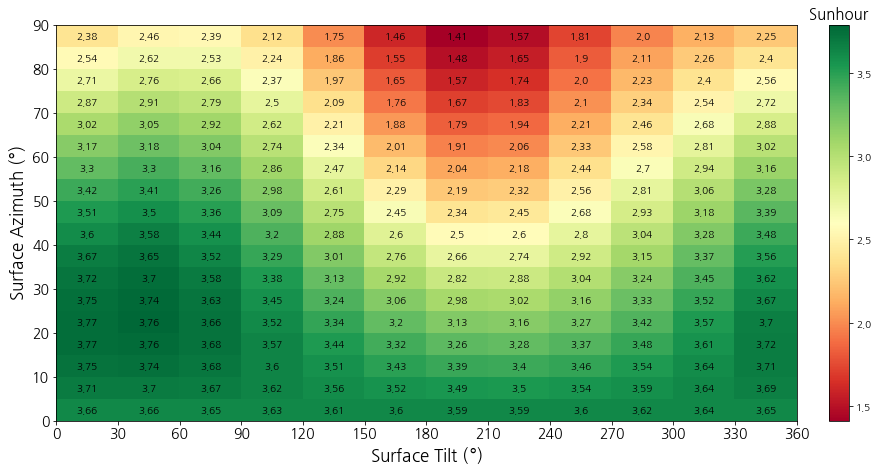

In [14]:
# note that shape of Z is equal to (len(Y), len(X))
X = np.array(data.index, dtype=float)
Y = np.array(data.columns, dtype=float)
Z = data.as_matrix().T

fig, ax = plt.subplots(1, 1)
ax.grid(axis='y', linestyle='-.', zorder=0)
ax.tick_params(labelsize=14)

im = ax.pcolormesh(X, Y, Z, cmap='RdYlGn')
cbar =fig.colorbar(im, fraction=0.046, pad=0.04)
cbar.ax.set_title('Sunhour', fontsize=15)

ax.set_xticks(X)
ax.set_xticklabels(['{}'.format(int(a)) for a in X])

ax.set_xlabel('Surface Tilt ($\degree$)', fontsize=17)
ax.set_ylabel('Surface Azimuth ($\degree$)', fontsize=17)

# overlay numbers
for i in range(len(X)):
    if i == (len(X) - 1):
        continue
    for j in range(len(Y)):
        if j == (len(Y) - 1):
            continue
        
        val = round((Z[j, i] + Z[j+1, i] + Z[j, i+1] + Z[j+1, i+1])/4., 2)
        plt.text(X[i]+30/2., Y[j]+5/2., val, horizontalalignment='center', verticalalignment='center')

fig.subplots_adjust(right=2, top=1.5)

## A1. image

In [15]:
with open('data/clearsky_map.pkl', 'rb') as f:
    cs = pickle.load(f)
    
with open('data/irradiance_heatmap.pkl', 'rb') as f:
    irr = pickle.load(f)


In [16]:
# boundary for south korea
boundary_idx = [(800, 441), (796, 690), (463, 449), (459, 672)]
n_lat = 341
n_lng = 249

In [17]:
# 1st dimension is reverse ordered
irr = np.array(irr).reshape(n_lat, n_lng)[::-1, :]

In [18]:
def get_boundary_idx(b, th=10):
    l = []
    zero_count = 0
    
    is_first = True
    start_idx = None
    end_idx = None

    for i in range(len(b)):
        if b[i] == 0:
            zero_count += 1
        else:
            if start_idx is None:
                start_idx = i
            end_idx = i   
            zero_count = 0

        if (zero_count >= 10) and (start_idx is not None):
            l.append((start_idx, end_idx))
            start_idx = None
            end_idx = None
    
    if start_idx is not None:
        l.append((start_idx, end_idx))
        
    return l

In [19]:
_cs = cs.copy()
# threshold for boundary extraction
_cs[_cs < 9] = 0

# extract boundary (naive method)
boundary_arr = pd.DataFrame(_cs).apply(lambda x: get_boundary_idx(x, th=3), axis=1)

bx = []
by = []
for i, i1 in enumerate(boundary_arr):
    for i2 in i1:
        for i3 in i2:
            by.append(i)
            bx.append(i3)

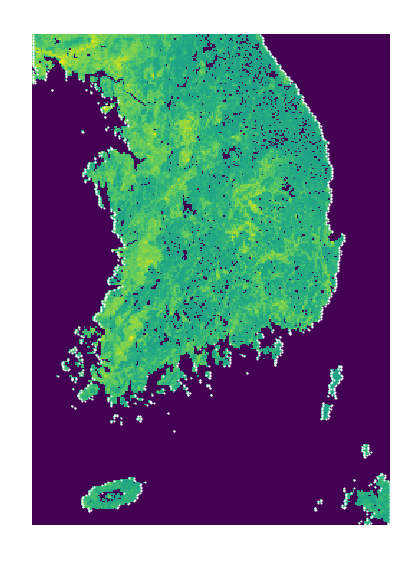

In [20]:
# boundary extraction result
fig, ax = plt.subplots(1, 1)
ax.imshow(_cs)
ax.axis('off')
ax.scatter(bx, by, color='white', s=1)

fig.subplots_adjust(right=2, top=2)

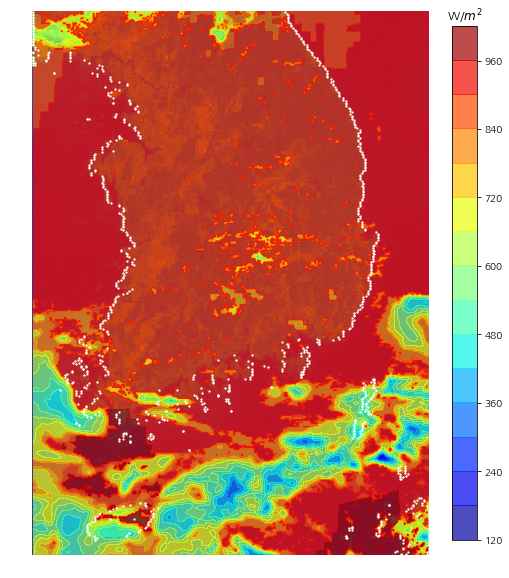

In [21]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax.imshow(cs)
ax.axis('off')

# y, x = np.mgrid[l_lat:u_lat, l_lng:u_lng]
y, x = np.mgrid[range(n_lat), range(n_lng)]
cb = ax.contourf(x, y, irr, 15, cmap='jet', alpha=0.7)

# coolwarm, jet, RdBu_r
cbar = fig.colorbar(cb, fraction=0.046, pad=0.04)
cbar.ax.set_title('W/$m^2$')

# boundary point
ax.scatter(bx, by, color='white', s=1.5)

plt.show()